In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

"""Generate data"""
trainSet = np.arange(0, 2*np.pi, 0.1)  #List of [0, 6.2]. 63 elements
testSet = np.arange(0.05, 2*np.pi, 0.1) #List of [0.05, 6.25]. 63 elements
trainTargetSin = np.sin(2*trainSet)
trainTargetSquare = signal.square(2*trainSet)
testTargetSin = np.sin(2*testSet)
testTargetSquare = signal.square(2*testSet)

In [2]:
class LeastSquares:
    def __init__(self, train, trainTarget, prototypes):
        self.train = train
        self.trainTarget = trainTarget
        self.prototypes = prototypes
        self.nodes = prototypes.size
        self.beta = np.ones(self.prototypes.size) #Variance - now set to equal for all
        self.phi = self.createPhi()
        self.weights = self.trainWeights()
        
    def createPhi(self):
        """Calls activation to calulate for each row. Puts them together to create phi matrix"""
        p = np.zeros((self.train.size, self.nodes))
        c = 0
        for x in self.train:
            p[:][c] = self.activation(x)
            c += 1
        return p
        
    def activation(self, pattern): 
        """Gauss simplified e^(-beta(x-mu)^2). Calculates for each row"""
        return np.e**(np.multiply(-1*self.beta, (pattern-self.prototypes)**2))
        
    def trainWeights(self):
        """Calculating W = (phi^T * phi)^-1 * phi^T * f. Split for easier reading"""
        phiphi = np.linalg.inv(np.dot(np.transpose(self.phi), self.phi)) #(phi^T * phi)^-1
        phif = np.dot(np.transpose(self.phi), self.trainTarget) #phi^T * f
        return np.dot(phiphi, phif)
        
    def run(self, patterns):
        res = np.zeros(patterns.size)
        c = 0
        for x in patterns:
            res[c] = sum(np.multiply(self.weights, self.activation(x)))
            c += 1
        return res

    def residualError(self, patterns, targets):
        """Calculates residual error"""
        res = self.run(patterns)
        diff = np.absolute(res-targets)
        return np.average(diff)
    
    def residualErrorTransformed(self, patterns, targets):
        """Calculates residual error when all elements > 0 becomes 1 and all else becomes -1"""
        res = self.run(patterns)
        res[res >= 0] = 1
        res[res < 0] = -1
        diff = np.absolute(res-targets)
        return np.average(diff)

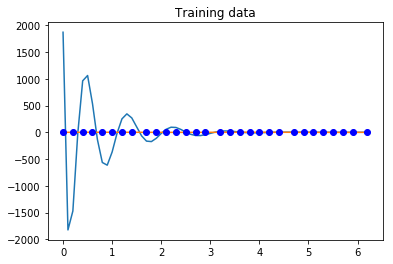

Residual error:  184.440072526


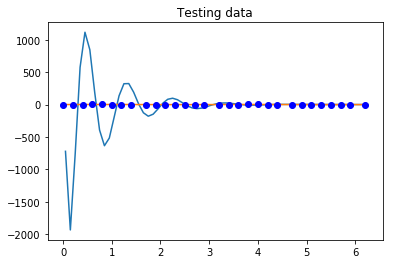

Residual error:  159.780825317


In [10]:
#SIN
"""Checking training data error for 10 nodes"""
index = np.linspace(0, trainSet.size-1, num = 30, dtype= int)
a = LeastSquares(trainSet, trainTargetSin, trainSet[index])
plt.plot(trainSet, a.run(trainSet))
plt.plot(trainSet, trainTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "bo")
plt.title("Training data")
plt.show()
print("Residual error: ", a.residualError(trainSet, trainTargetSin))

"""Checking testing data error for 10 nodes"""
plt.plot(testSet, a.run(testSet))
plt.plot(testSet, testTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "bo")
plt.title("Testing data")
plt.show()
print("Residual error: ", a.residualError(testSet, testTargetSin))

In [9]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are evenly spaced"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    index = np.linspace(0, trainSet.size-1, num = i, dtype= int)
    ls = LeastSquares(trainSet, trainTargetSin, trainSet[index])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSin), "  -  ", ls.residualError(testSet, testTargetSin))

Nodes - Training Error   -   Testing Error
1   -   0.583956639739   -   0.577148105464
2   -   0.515493969769   -   0.514204650237
3   -   0.514920512299   -   0.514280775436
4   -   0.401847312033   -   0.402498063209
5   -   0.498979558625   -   0.501796089893
6   -   0.136974736335   -   0.139566055483
7   -   0.0440760424417   -   0.0450981050415
8   -   0.0214239937824   -   0.0218427738672
9   -   0.0189990663867   -   0.0191883276986
10   -   0.0109433642875   -   0.0114592418721
11   -   0.00981036041088   -   0.0103318433124
12   -   0.00446144846621   -   0.00467623408766
13   -   0.00392730432662   -   0.00400358116178
14   -   0.0014665242783   -   0.00153424341884
15   -   0.00122941489733   -   0.00125449347139
16   -   0.000423198004973   -   0.000465420287628
17   -   0.000315217883525   -   0.000349307398111
18   -   0.000128027444452   -   0.000140564553496
19   -   0.00240846889343   -   0.00226408810645
20   -   0.0424241333652   -   0.0397366643992
21   -   1.11742

In [5]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are clustered from index 0 and forward"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    ls = LeastSquares(trainSet, trainTargetSin, trainSet[0:i])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSin), "  -  ", ls.residualError(testSet, testTargetSin))

Nodes - Training Error   -   Testing Error
1   -   0.583956639739   -   0.577148105464
2   -   0.515768763789   -   0.514903063841
3   -   0.518059720864   -   0.513862870554
4   -   0.479161557835   -   0.475653569529
5   -   0.416416646725   -   0.413762107527
6   -   0.364210428558   -   0.363784193662
7   -   0.351014903939   -   0.351272244461
8   -   0.360673930937   -   0.359442409426
9   -   0.374924417354   -   0.37567706142
10   -   0.36770188183   -   0.369747742244
11   -   0.418609907116   -   0.416987871603
12   -   0.33817629509   -   0.339864515302
13   -   0.350701473152   -   0.345793309901
14   -   0.395754072531   -   0.396758016545
15   -   0.360884952548   -   0.363507290355
16   -   0.275645504978   -   0.273704253749
17   -   0.325496232173   -   0.31342442533
18   -   0.33573823253   -   0.331207292247
19   -   0.287708701647   -   0.285022828928
20   -   0.238179589724   -   0.235347074643
21   -   0.360685146768   -   0.357313902711
22   -   0.291577647994   

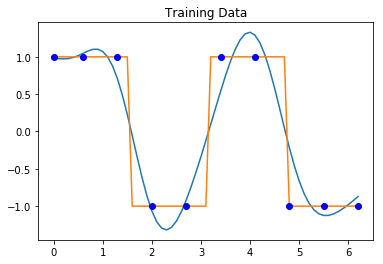

Residual error:  0.268602988991


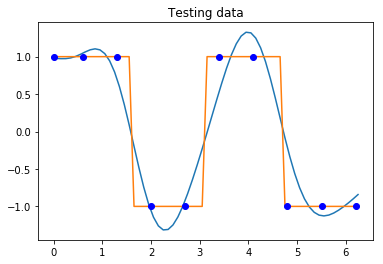

Residual error:  0.269265559993


In [17]:
#SQUARE
"""Checking training data error for 10 nodes"""
index = np.linspace(0, trainSet.size-1, num = 10, dtype= int)
a = LeastSquares(trainSet, trainTargetSquare, trainSet[index])
plt.plot(trainSet, a.run(trainSet))
plt.plot(trainSet, trainTargetSquare)
plt.plot(trainSet[index], trainTargetSquare[index], "bo")
plt.title("Training Data")
plt.show()
print("Residual error: ", a.residualError(trainSet, trainTargetSquare))

"""Checking testing data error for 10 nodes"""
plt.plot(testSet, a.run(testSet))
plt.plot(testSet,testTargetSquare)
plt.plot(trainSet[index], trainTargetSquare[index], "bo")
plt.title("Testing data")
plt.show()
print("Residual error: ", a.residualError(testSet, testTargetSquare))



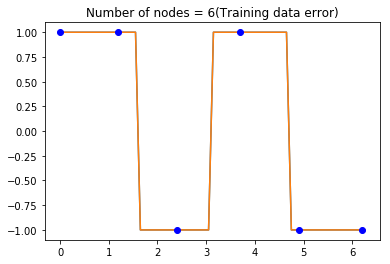

Residual error:  0.0


In [19]:
"""Checking testing data error for 6 nodes - Transformed"""
index = np.linspace(0, trainSet.size-1, num = 6, dtype= int)
a = LeastSquares(trainSet, trainTargetSquare, trainSet[index])
trans = a.run(testSet)
trans[trans >= 0] = 1
trans[trans < 0] = -1
plt.plot(testSet, trans)
plt.plot(testSet,testTargetSquare)
plt.plot(trainSet[index], trainTargetSquare[index], "bo")
plt.title("Number of nodes = 6(Training data error)")
plt.show()
print("Residual error: ", a.residualErrorTransformed(testSet, testTargetSquare))

In [7]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are evenly spaced"""
print("Nodes - Training Error   -   Testing Error  -  Transformed testing error")
for i in range(1, trainSet.size + 1):
    index = np.linspace(0, trainSet.size-1, num = i, dtype= int)
    ls = LeastSquares(trainSet, trainTargetSquare, trainSet[index])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSquare), "  -  ", ls.residualError(testSet, testTargetSquare), "  -  ", ls.residualErrorTransformed(testSet, testTargetSquare))

Nodes - Training Error   -   Testing Error  -  Transformed testing error
1   -   0.853794931649   -   0.857625849543   -   0.984126984127
2   -   0.710949033943   -   0.707032775621   -   0.984126984127
3   -   0.710059706986   -   0.707208180309   -   0.634920634921
4   -   0.503136341379   -   0.516079916926   -   0.253968253968
5   -   0.669111828552   -   0.683025999023   -   0.349206349206
6   -   0.29922930634   -   0.296030166208   -   0.0
7   -   0.292502681202   -   0.295783380015   -   0.0634920634921
8   -   0.293842955064   -   0.295541423161   -   0.031746031746
9   -   0.289850330891   -   0.291822686754   -   0.0
10   -   0.268602988991   -   0.269265559993   -   0.031746031746
11   -   0.266571282645   -   0.267092233198   -   0.031746031746
12   -   0.253388606874   -   0.258839169961   -   0.0634920634921
13   -   0.242397447048   -   0.255926300825   -   0.0952380952381
14   -   0.190352302943   -   0.195202265672   -   0.0634920634921
15   -   0.186990589099   -   0

In [8]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are clustered from index 0 and forward"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    ls = LeastSquares(trainSet, trainTargetSquare, trainSet[0:i])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSquare), "  -  ", ls.residualError(testSet, testTargetSquare))

Nodes - Training Error   -   Testing Error
1   -   0.853794931649   -   0.857625849543
2   -   0.818628697103   -   0.821216651128
3   -   0.835943005367   -   0.838639645926
4   -   0.766083095631   -   0.776436203372
5   -   0.658474102401   -   0.666026565783
6   -   0.624244657784   -   0.635203357238
7   -   0.624866499395   -   0.6363452615
8   -   0.637552086991   -   0.648211629904
9   -   0.665529914721   -   0.674195549144
10   -   0.647561733871   -   0.657990132222
11   -   0.618393846961   -   0.625443124426
12   -   0.608114395848   -   0.621285013734
13   -   0.644113690948   -   0.639548498781
14   -   0.506871115767   -   0.51036640135
15   -   0.572887901463   -   0.584740531919
16   -   0.756999419974   -   0.764487663341
17   -   0.752580285134   -   0.764486732597
18   -   0.62571775058   -   0.645579268269
19   -   0.46880058575   -   0.479188356924
20   -   0.505341874959   -   0.517344147741
21   -   0.504981537816   -   0.502000926868
22   -   0.551812475334   

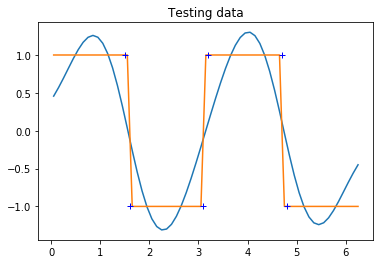

Residual error:  0.319078691206


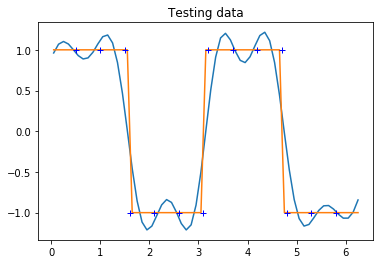

Residual error:  0.187710657267


In [9]:
#SQUARE experiments with manually chosen prototypes
"""Checking testing data error with manually chosen prototypes, 6 nodes"""
index = np.array((15,16,31,32,47,48))
a = LeastSquares(trainSet, trainTargetSquare, trainSet[index])
plt.plot(testSet, a.run(testSet))
plt.plot(testSet,testTargetSquare)
plt.plot(trainSet[index], trainTargetSquare[index], "b+")
plt.title("Testing data")
plt.show()
print("Residual error: ", a.residualError(testSet, testTargetSquare))

"""Checking testing data error with manually chosen prototypes, 12 nodes"""
index = np.array((5,10,15,16,21,26,31,32,37,42,47,48,53,58))
a = LeastSquares(trainSet, trainTargetSquare, trainSet[index])
plt.plot(testSet, a.run(testSet))
plt.plot(testSet,testTargetSquare)
plt.plot(trainSet[index], trainTargetSquare[index], "b+")
plt.title("Testing data")
plt.show()
print("Residual error: ", a.residualError(testSet, testTargetSquare))